# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

In [2]:
##After looking at the data, I would like to say no, there are too much 0 or falsy data

## Importing Librairies

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [124]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# check missing values for train
is_missing_values = train.isnull().sum()
print('missing values ', is_missing_values.sum())

# Check duplicated
len_train = len(train)
print('lenght train: ', len_train)
duplicated = train.duplicated().sum()
print('duplicated ', duplicated)
train = train.drop_duplicates()
len(train)

missing values  0
lenght train:  4107
duplicated  0


4107

In [125]:
##target
target = train['Buy']

## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


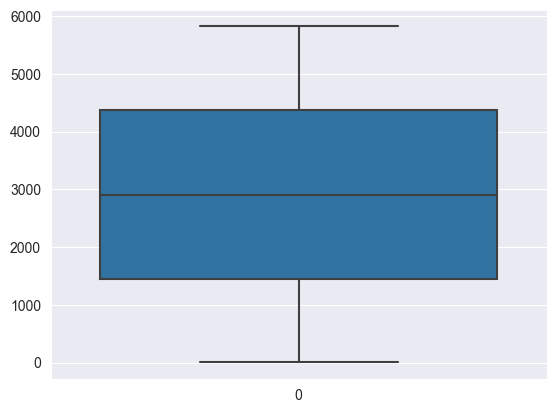

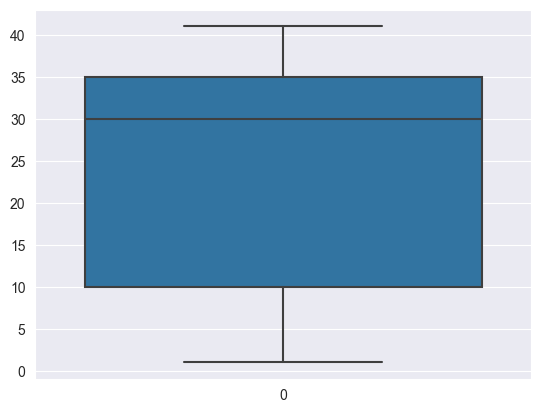

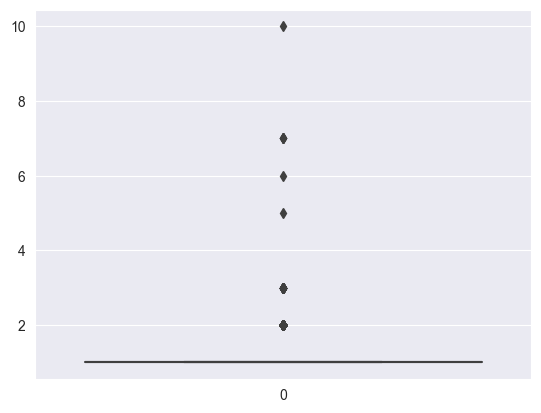

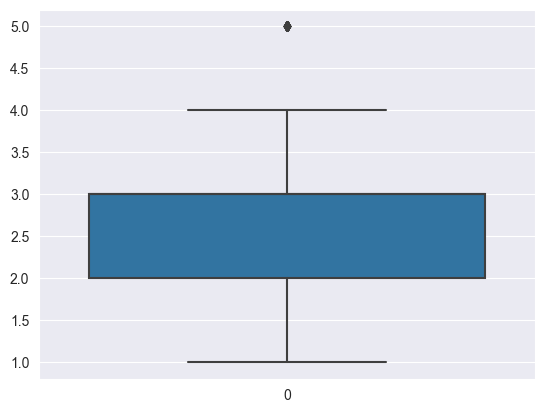

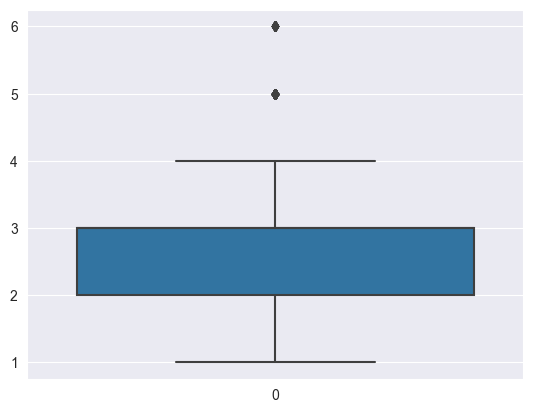

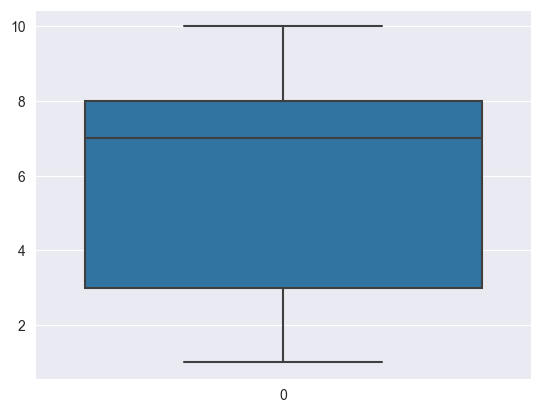

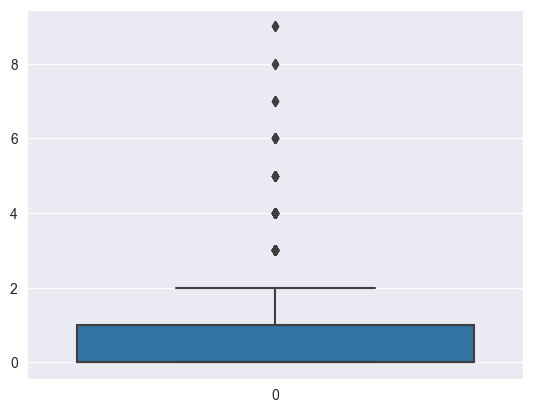

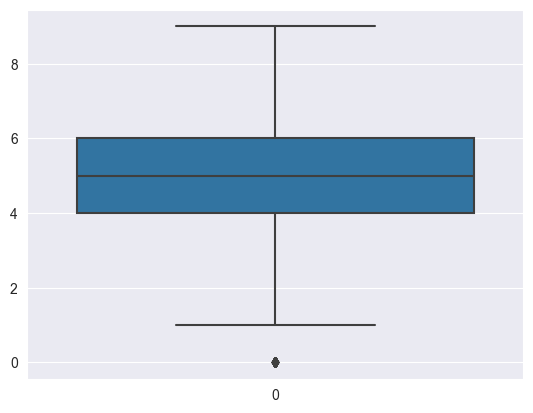

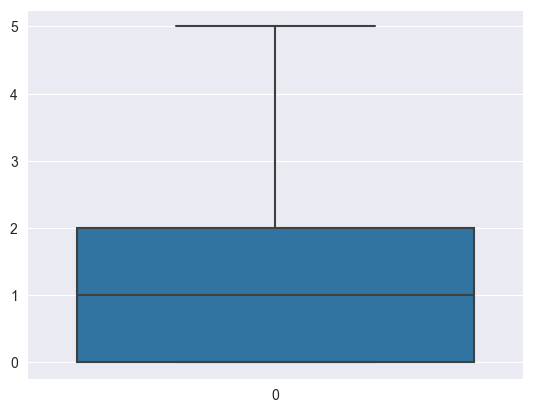

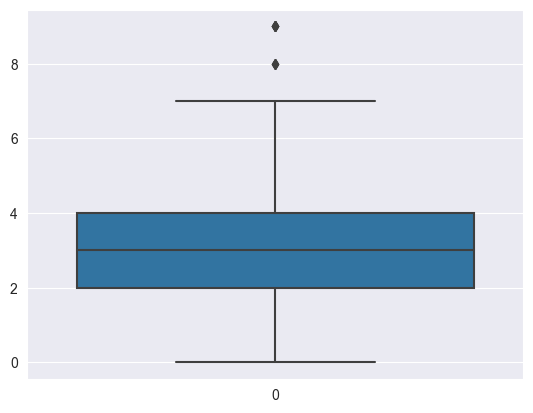

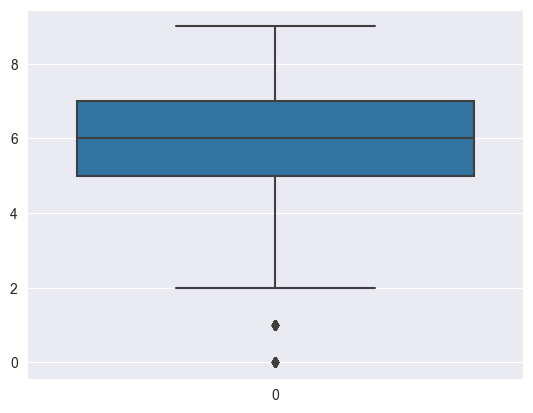

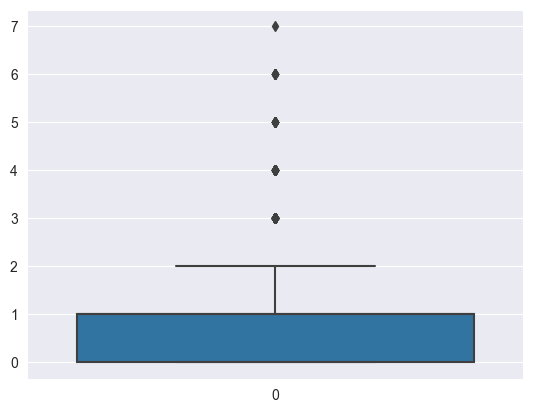

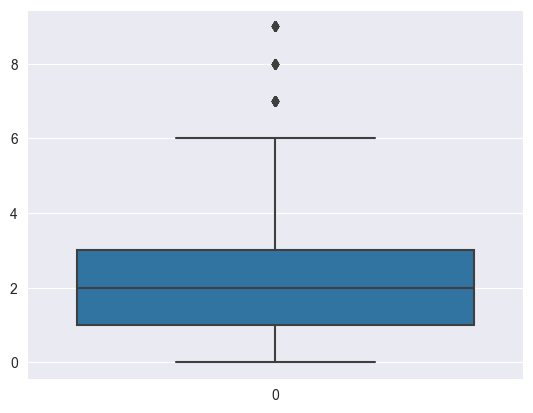

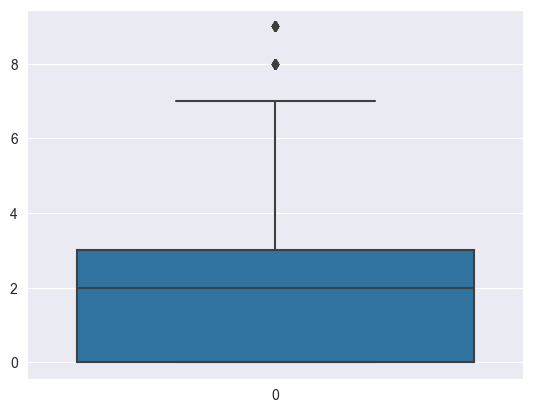

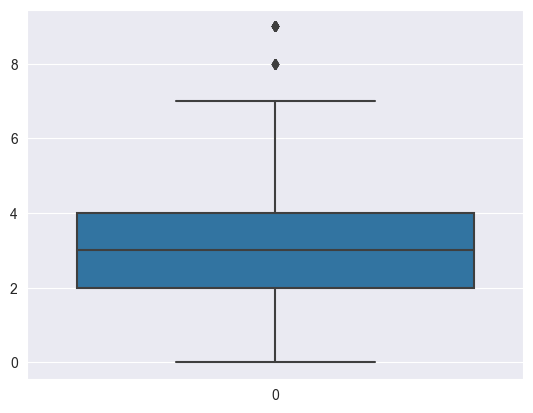

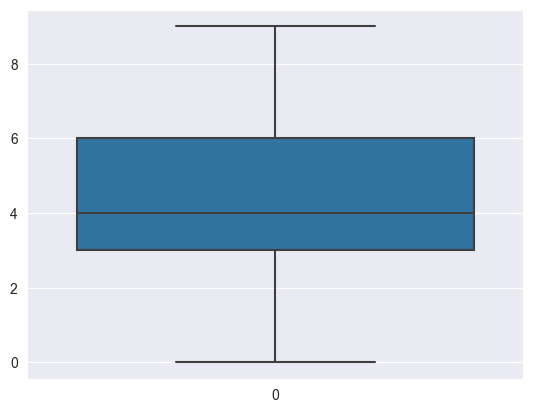

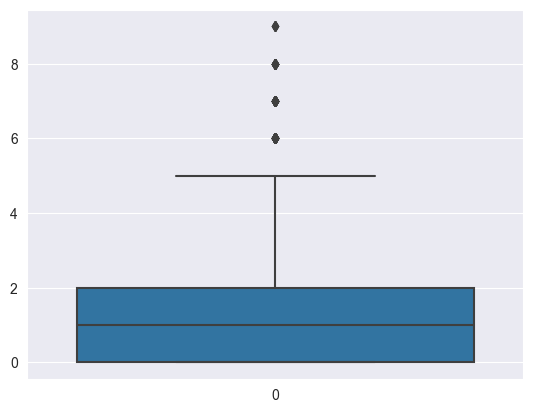

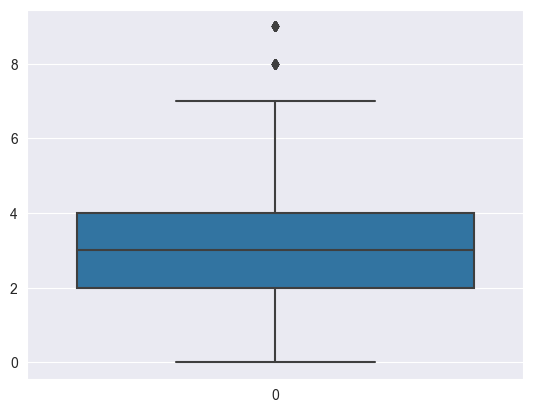

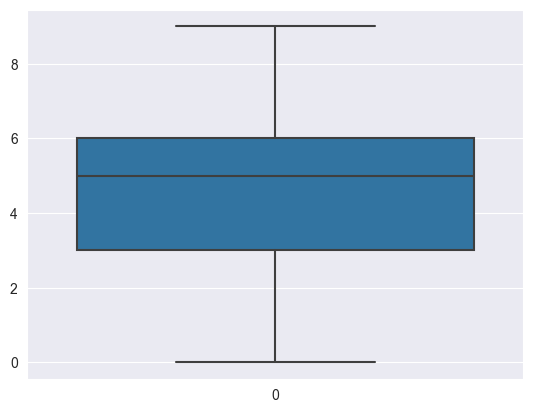

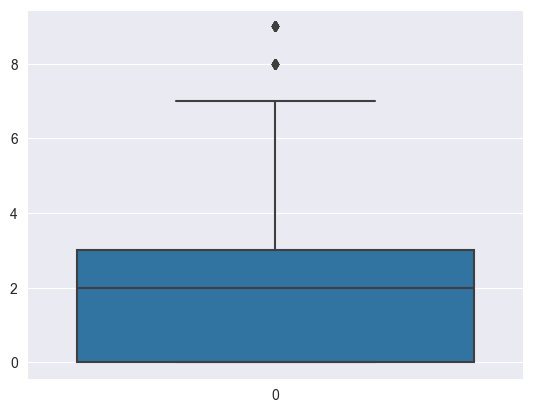

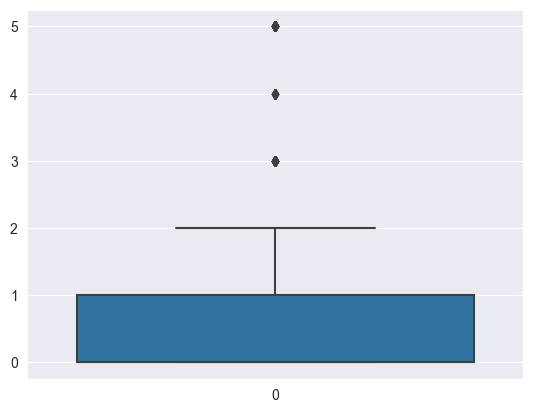

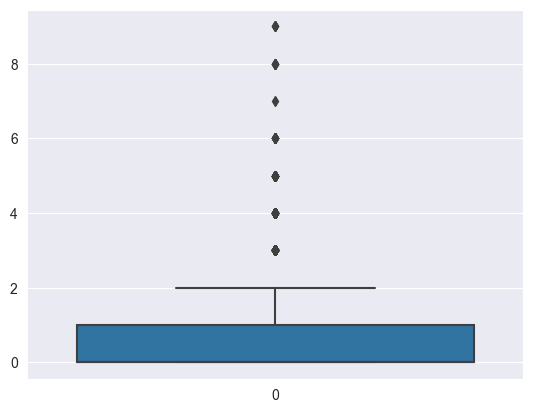

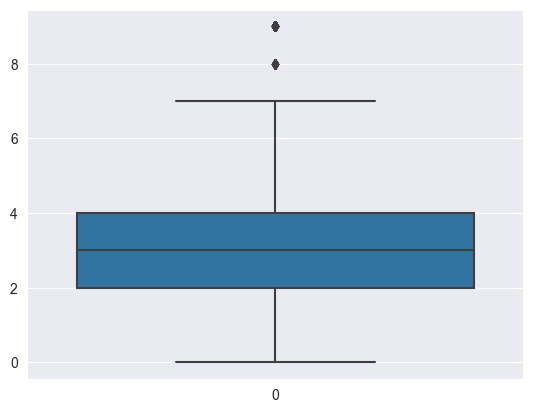

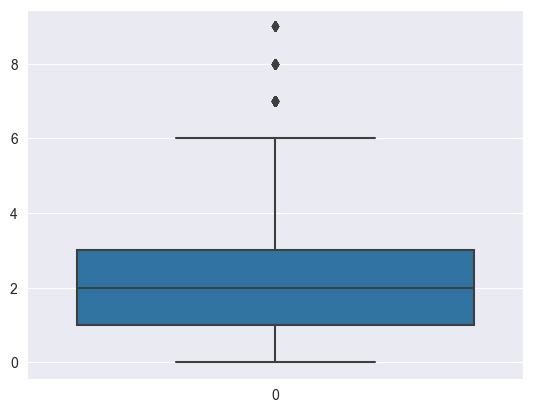

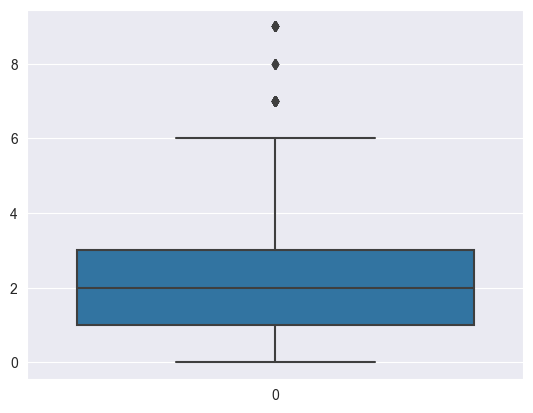

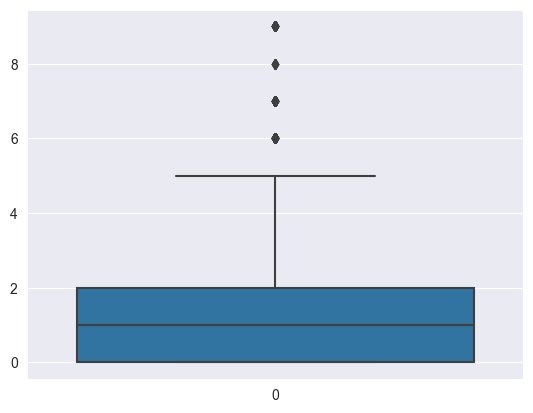

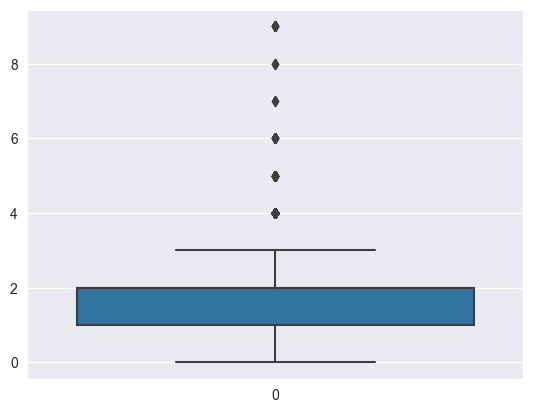

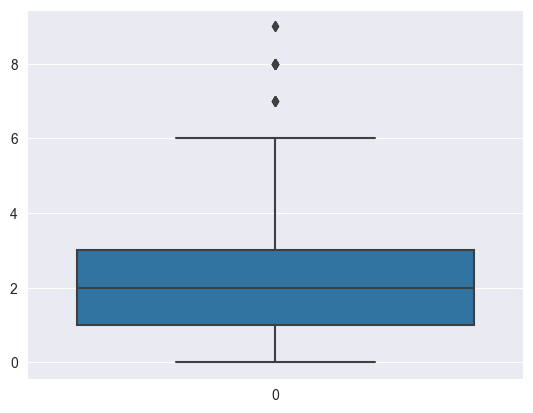

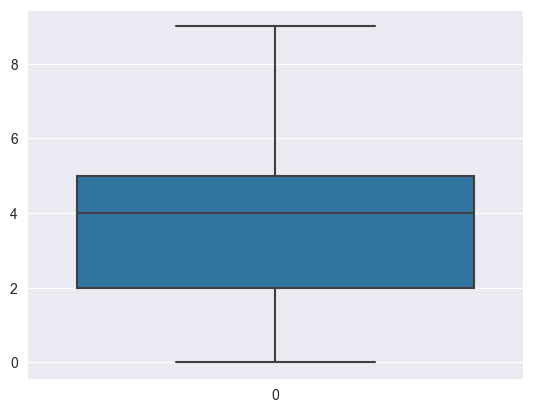

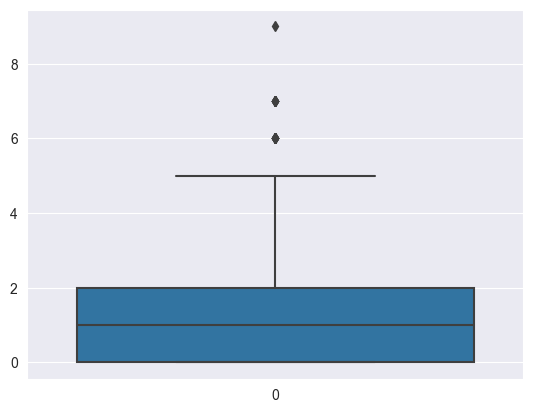

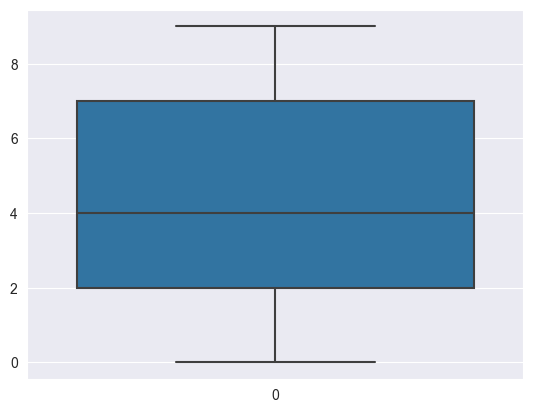

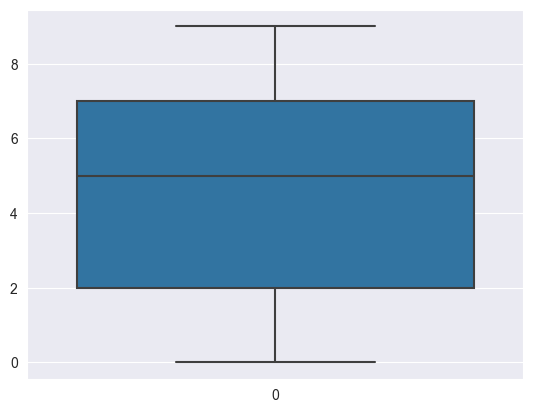

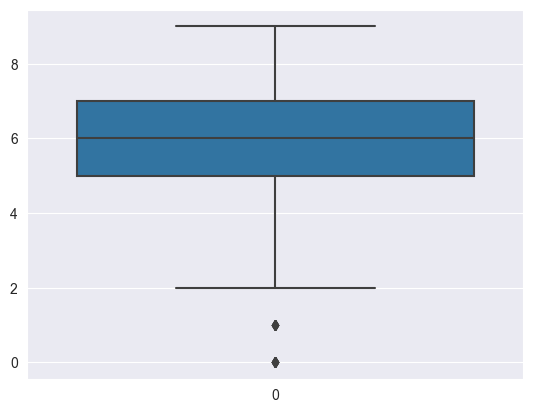

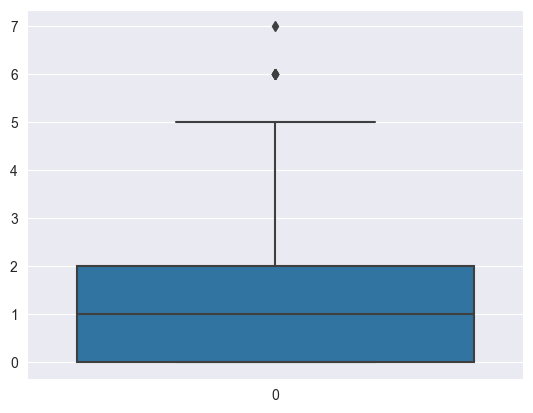

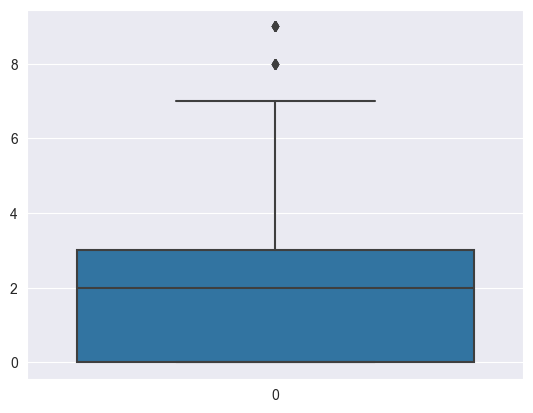

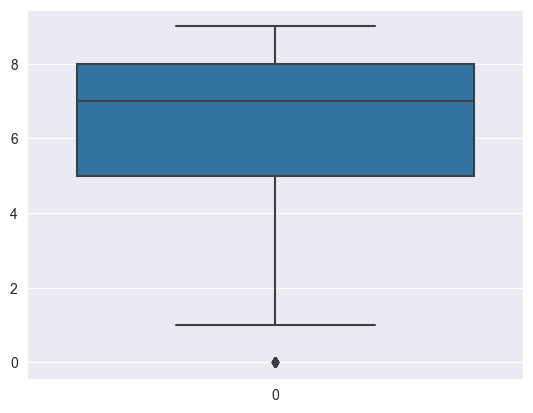

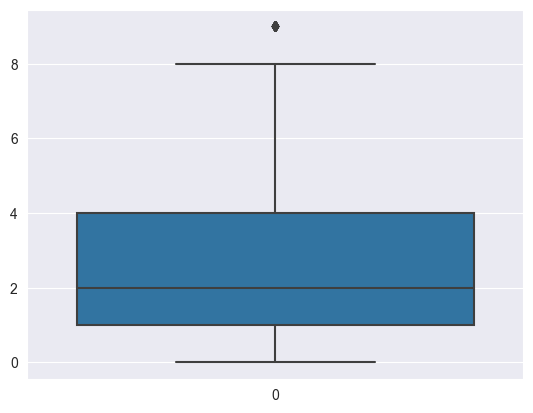

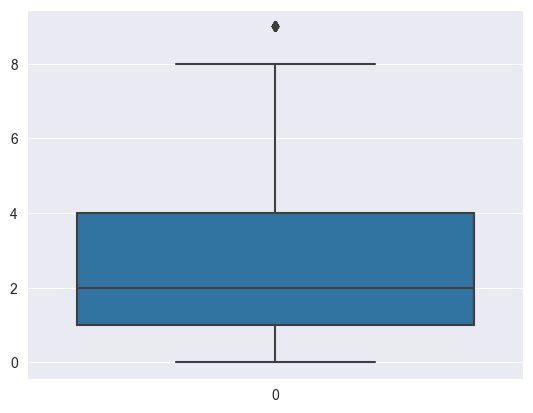

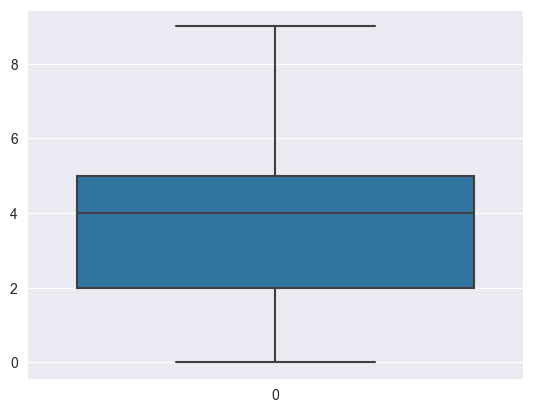

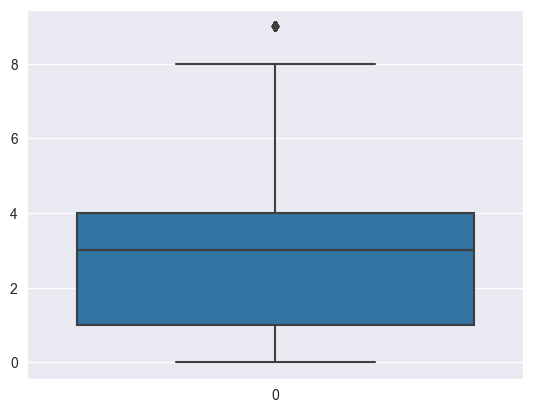

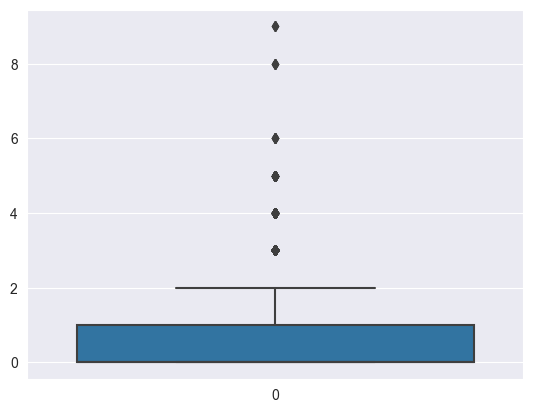

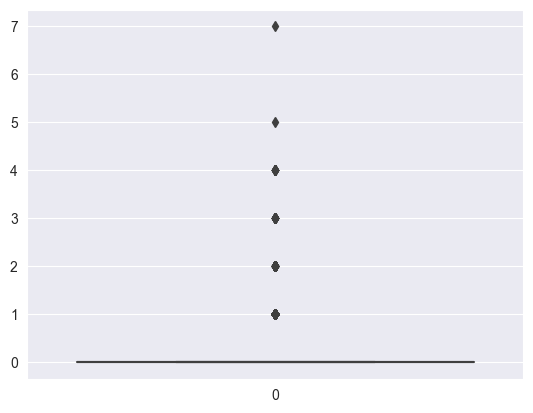

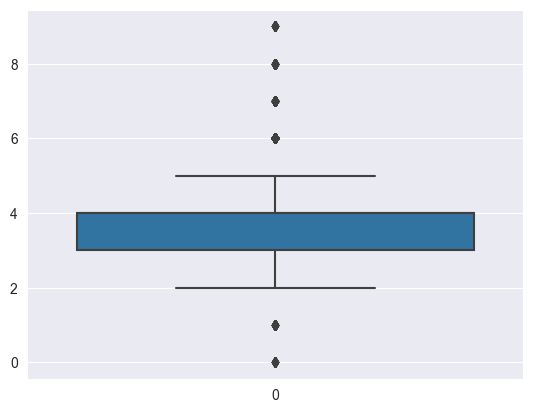

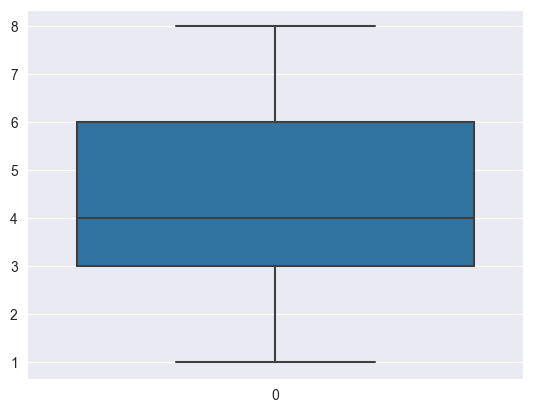

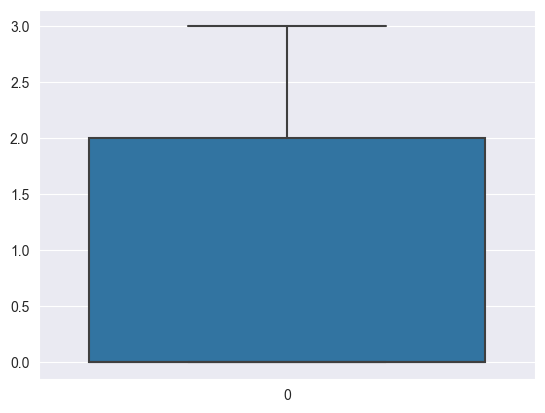

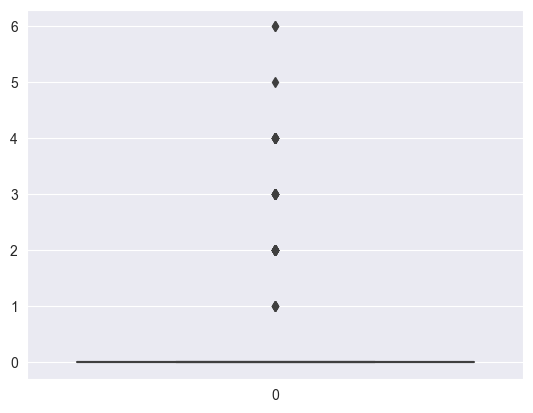

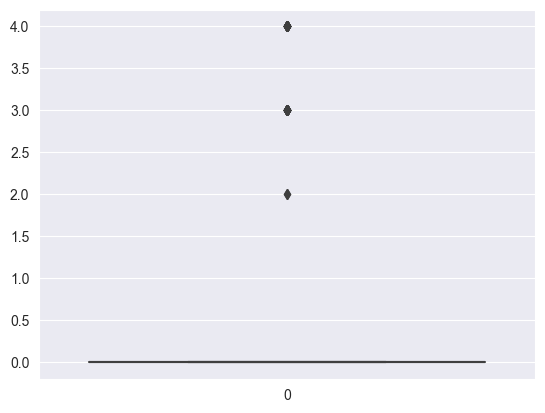

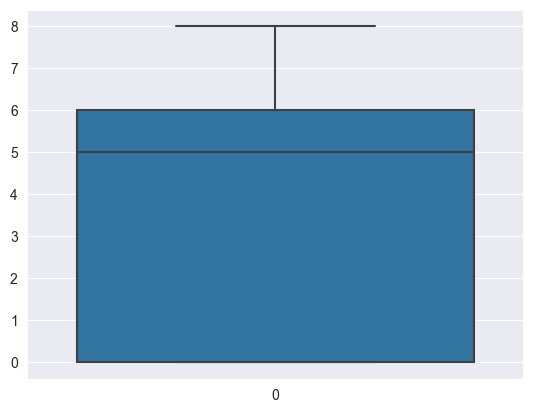

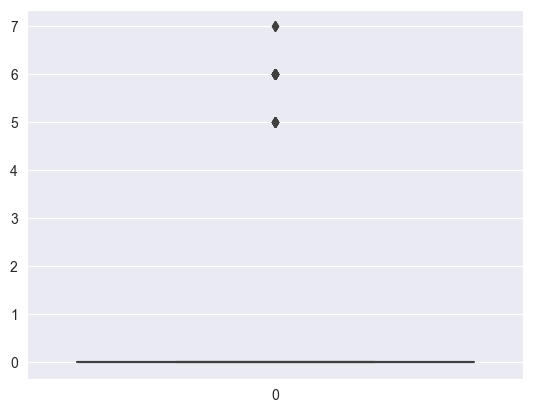

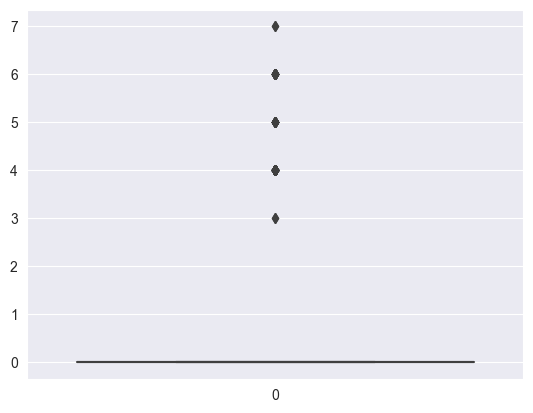

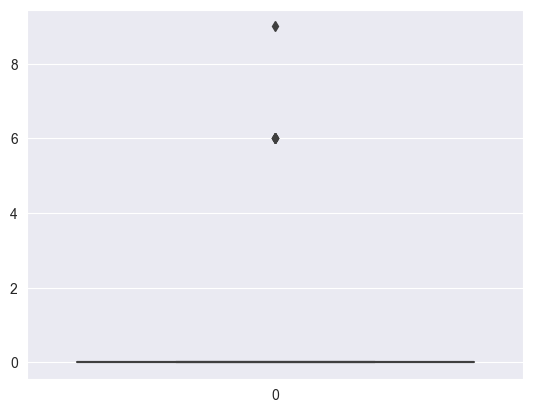

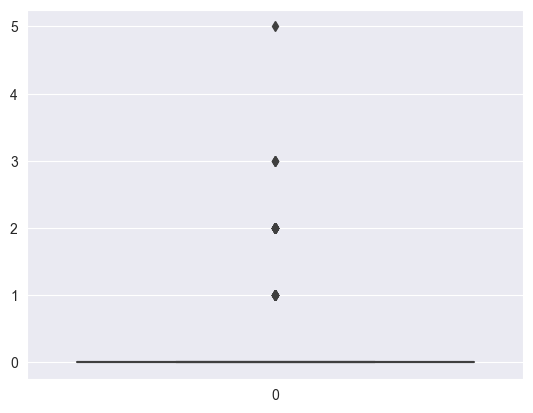

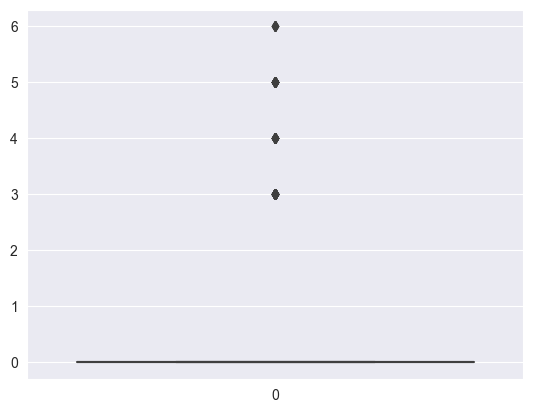

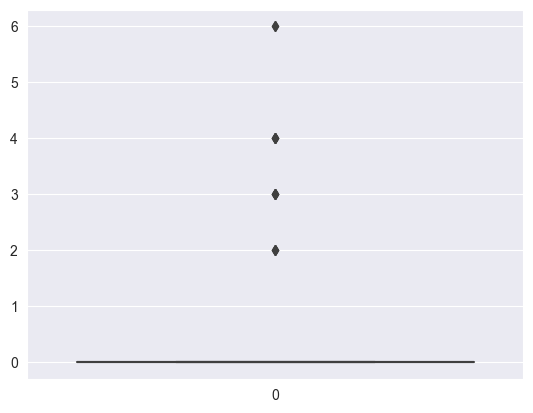

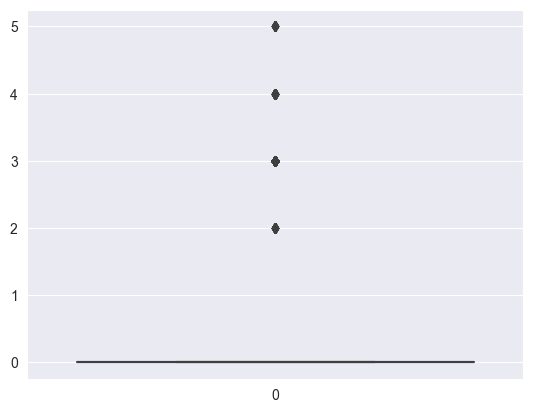

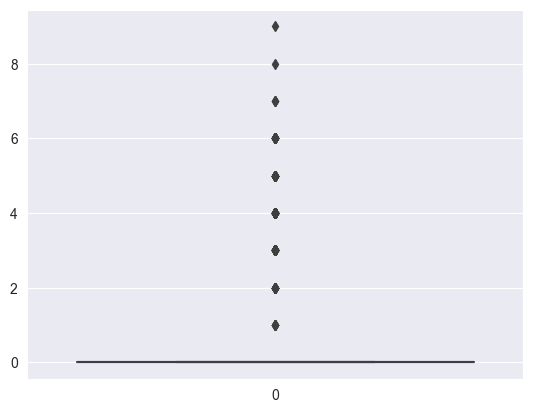

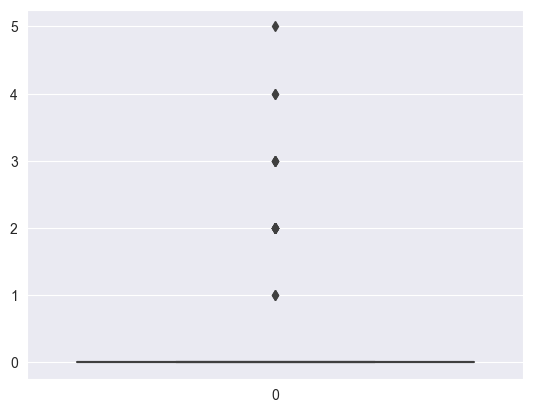

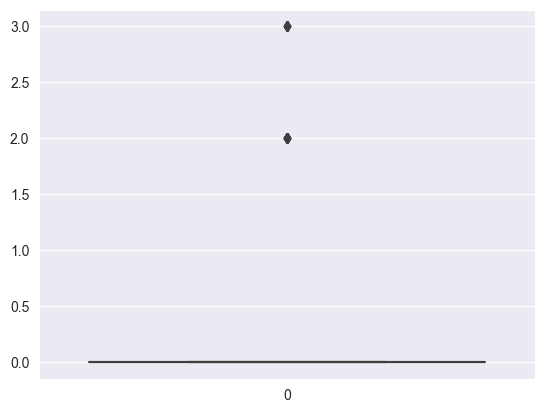

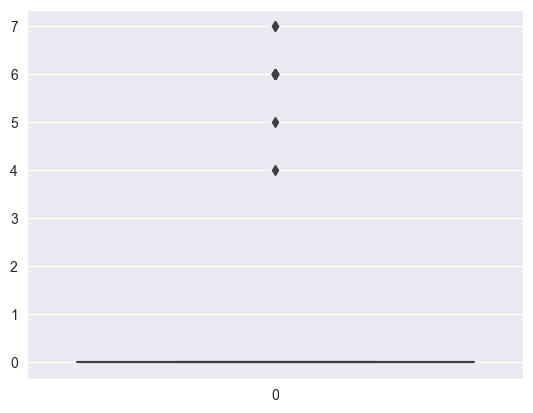

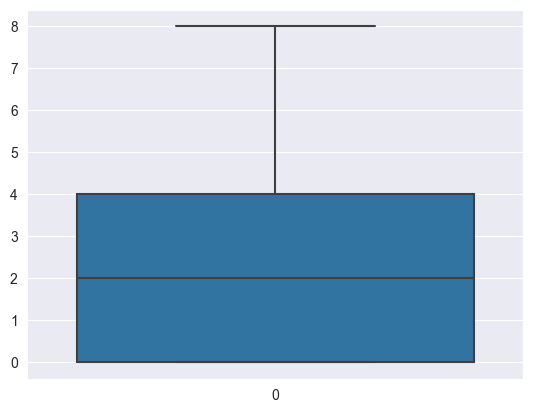

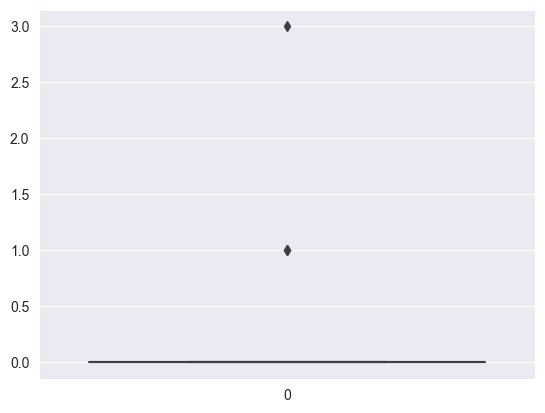

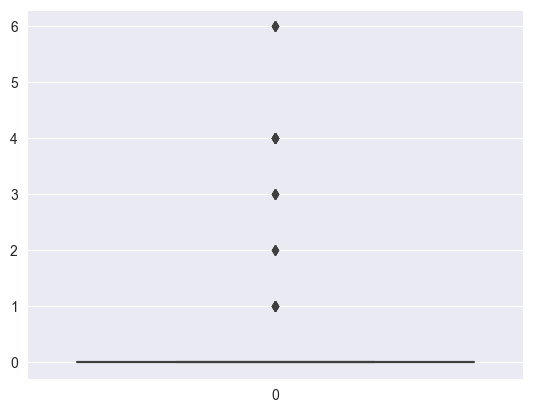

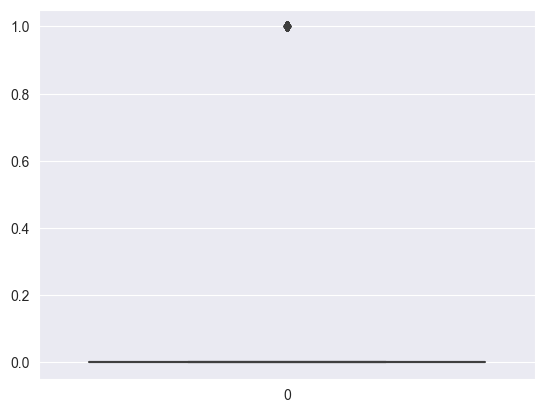

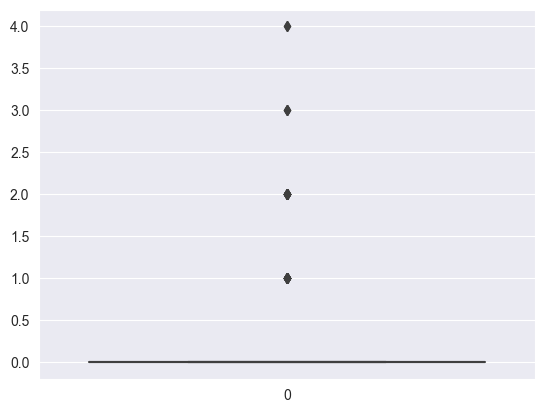

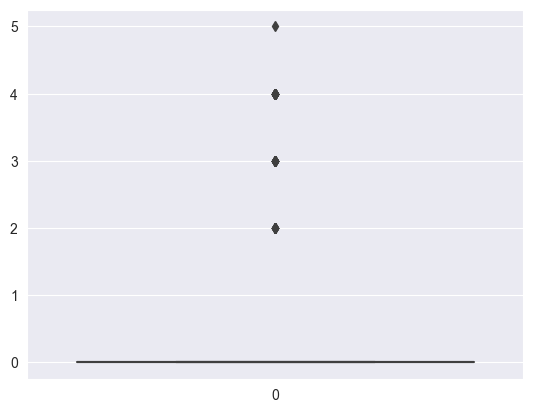

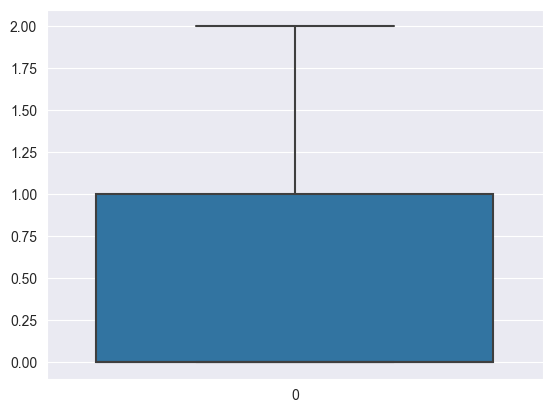

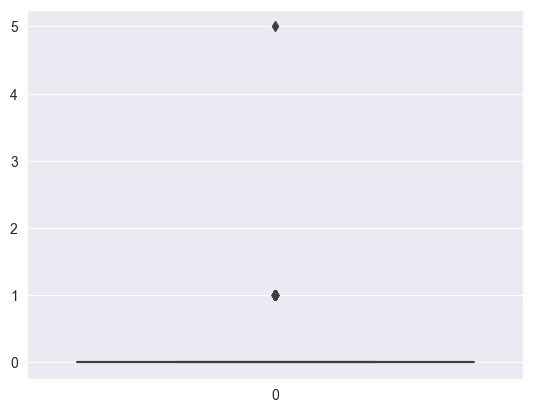

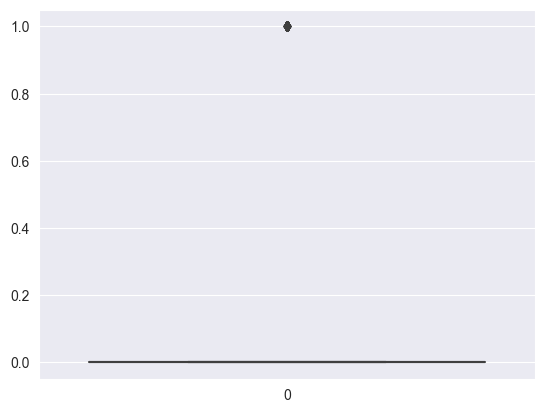

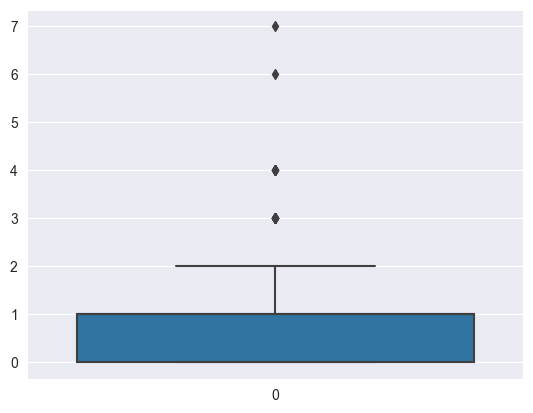

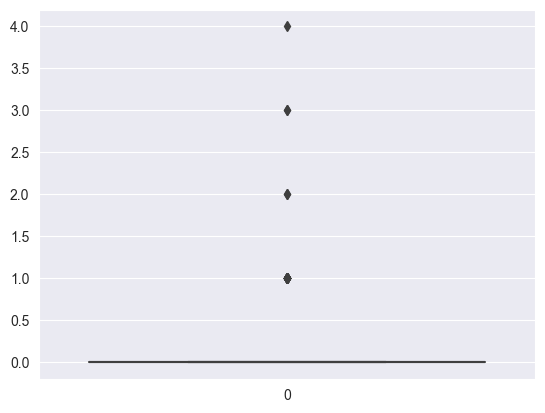

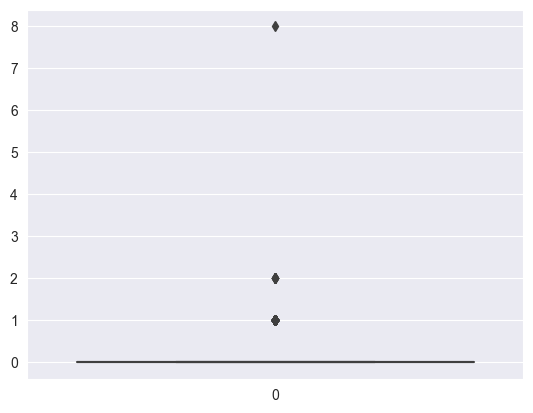

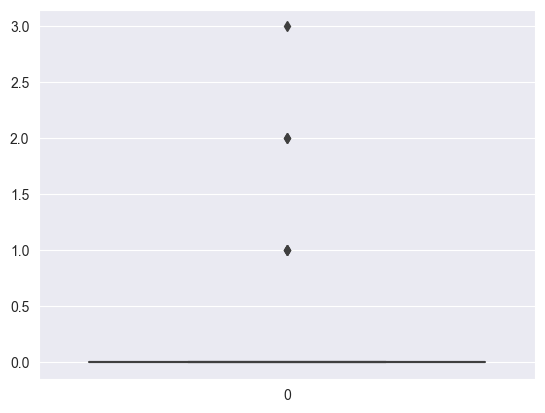

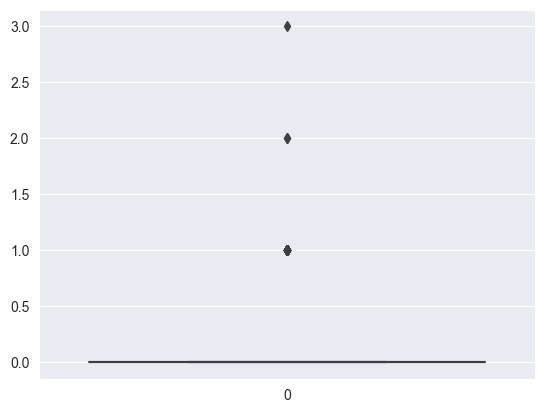

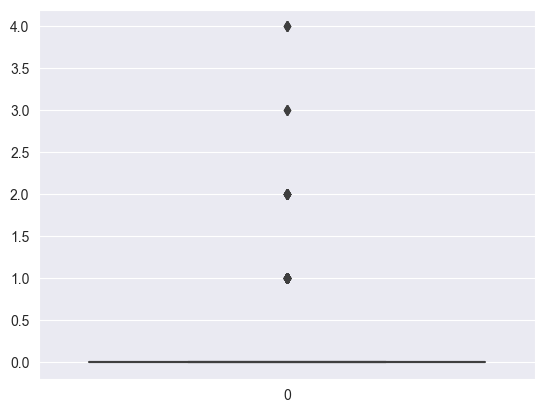

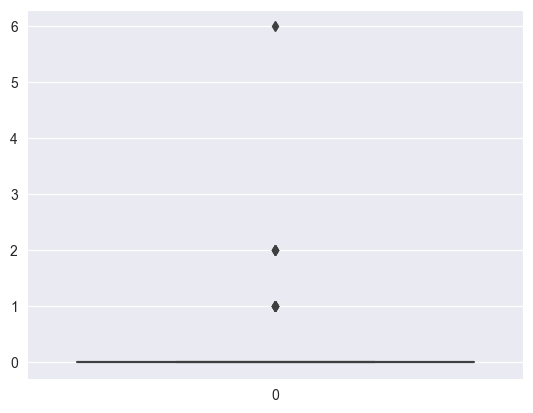

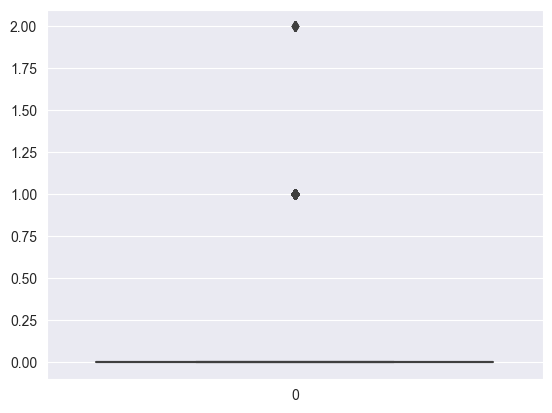

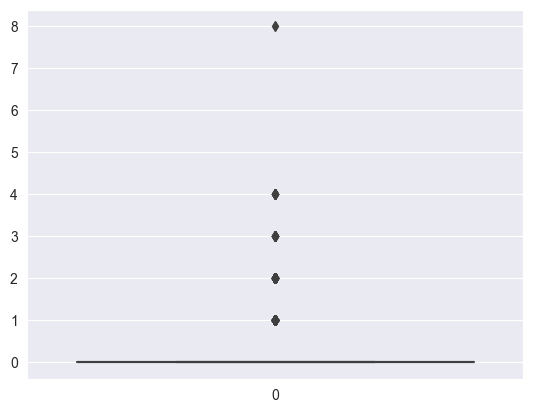

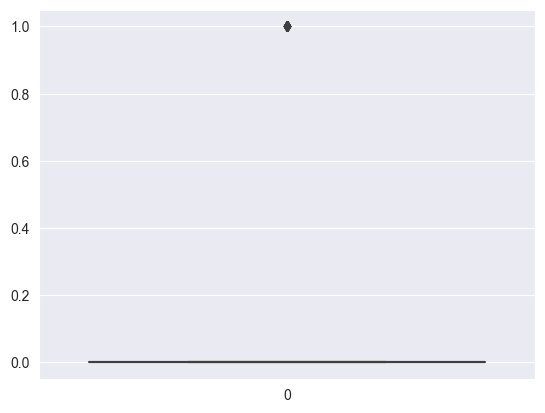

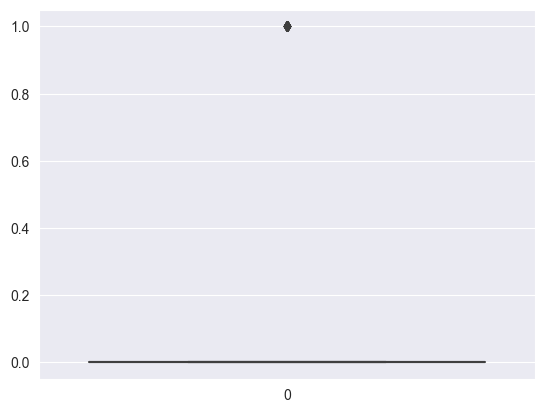

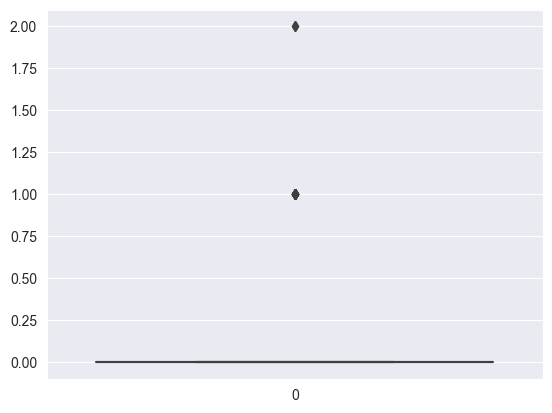

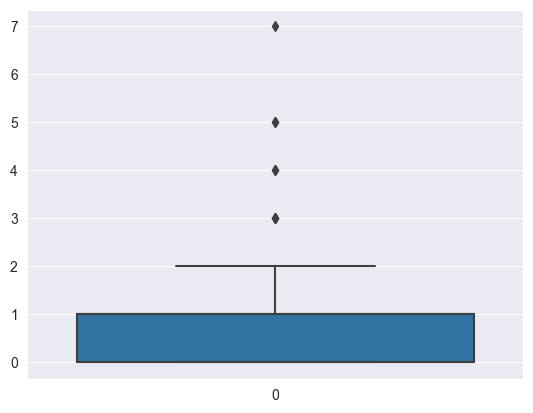

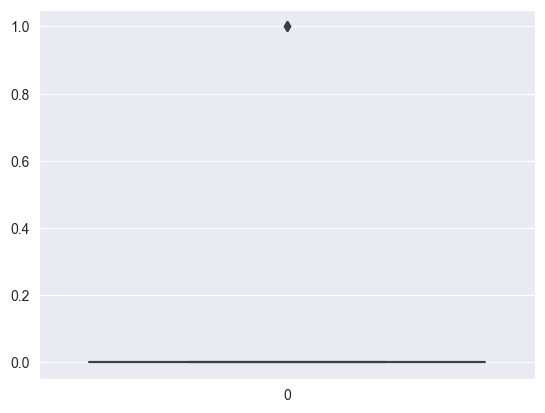

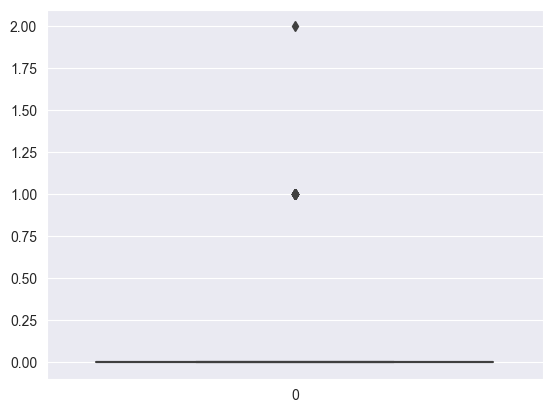

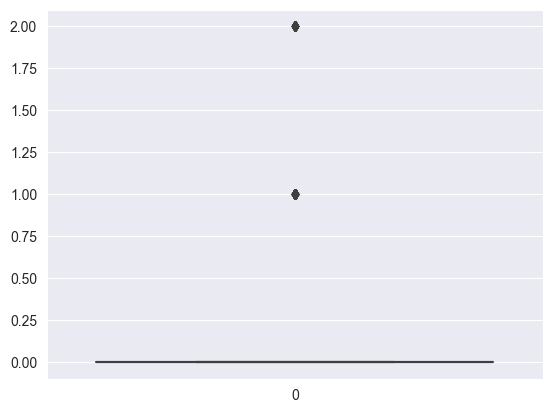

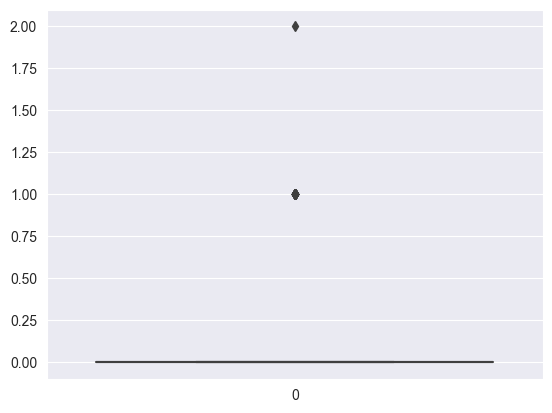

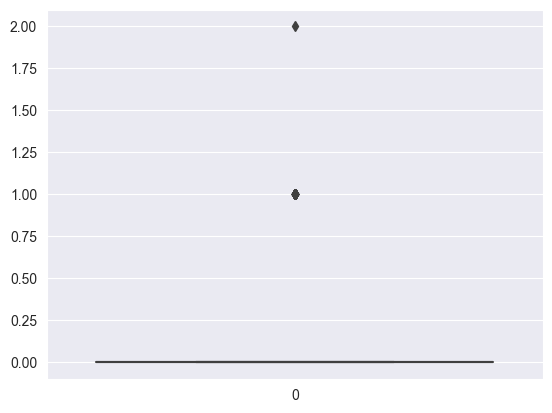

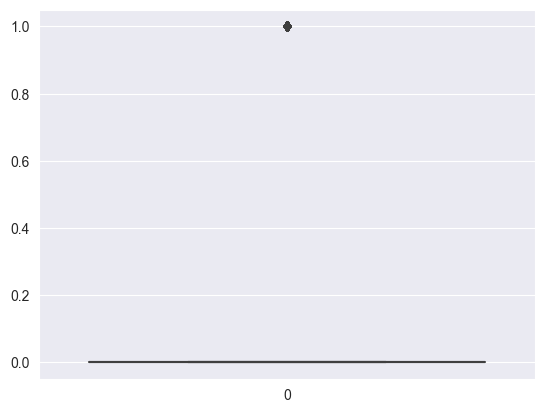

In [126]:
##visualize outliers
for column in train.columns:
    sns.boxplot(data=train[column])
    plt.show()

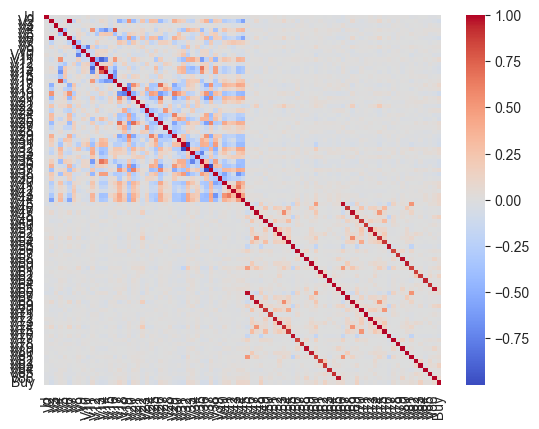

In [127]:
##Correlation
correlation_matrix = train.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names, cmap='coolwarm')
plt.show()

<Axes: xlabel='Buy', ylabel='count'>

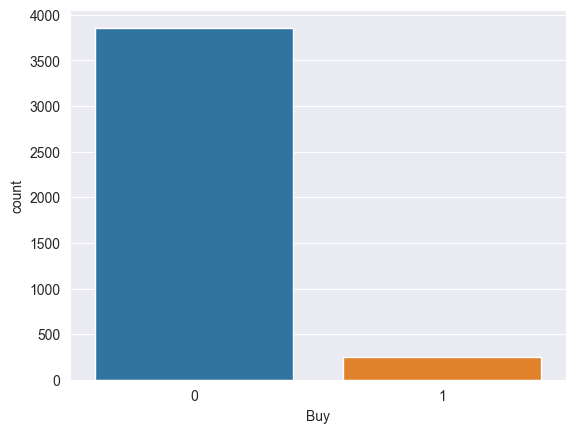

In [128]:
##plot
sns.countplot(train, x='Buy')

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

In [129]:
from imblearn.under_sampling import RandomUnderSampler

##remove Buy column as it is the target
x = train.drop('Buy', axis=1)
y = target

##Create and use sampler
sampler = RandomUnderSampler()
x_sampled, y_sampled = sampler.fit_resample(x, y)
#
# ##Create new dataset with sampled data
under_sampled_data = pd.concat([x_sampled, y_sampled], axis=1)
under_sampled_data['Buy'].value_counts()

Buy
0    248
1    248
Name: count, dtype: int64

## Building models
- Build a dummy model to have a baseline score
- Build a better model to classify your data and beat your baseline model
- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------
**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


In [130]:
##Dummy Model
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

new_x = under_sampled_data.drop('Buy', axis=1)
new_y = under_sampled_data['Buy']
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y)

#Create the model
dummy_model = DummyClassifier()
dummy_model.fit(x_train, y_train)
y_pred = dummy_model.predict(x_test)
dummy_model.score(x_test, y_test)

0.49193548387096775

In [131]:
##Better model with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=4000)
model.fit(x_train, y_train)
y_pred_2 = model.predict(x_test)
accuracy_score(y_test, y_pred_2)

0.6048387096774194

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Check accuracy and so on
accuracy = round(accuracy_score(y_test, y_pred_2),2)
precision = round(precision_score(y_test, y_pred_2),2)
recall = round(recall_score(y_test, y_pred_2),2)
f1 = round(f1_score(y_test, y_pred_2) ,2)
print('accuracy ', accuracy)
print('precision ', precision)
print('recall ', recall)
print('F1_score ', f1)

accuracy  0.6
precision  0.59
recall  0.66
F1_score  0.62


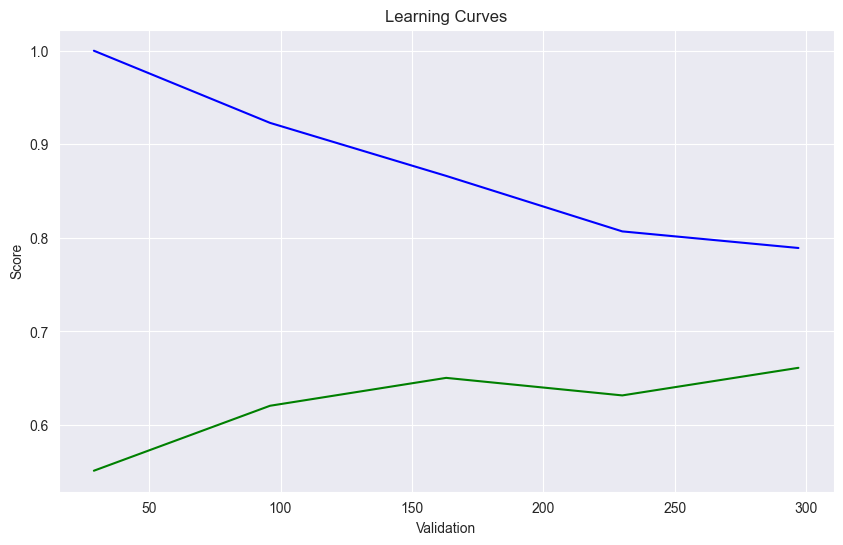

In [136]:
##Learning curves
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    model,
    x_train,
    y_train,
    cv=5,
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
# Update graph
plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Validation")
plt.ylabel("Score")
plt.legend()
# draw curves
plt.plot(train_sizes, train_scores_mean, color="b", label="Training Score")
plt.plot(train_sizes, val_scores_mean, color="g", label="Validation Score")


# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.